# <span style="color:#1E90FF">**Maternal Death Rates**</span> 
### <span style="color:#187bcd">Ana Boulay, PUBH 1142 Final Project</span>

## <span style="color:#1565C0">Introduction</span>

### <span style="color:black"> This project examines trends in maternal mortality in the United States using data compiled across multiple time periods from 2019 onward. The dataset, titled "Maternal Mortality Data", includes 660 records documenting monthly metrics on maternal deaths, live births, and calculated maternal mortality rates. The data is broken down by jurisdiction, demographic group, and time period, allowing for a detailed look at how maternal health outcomes vary over time and across different populations.

### <span style="color:black"> Key variables in the dataset include the number of maternal deaths, the total number of live births, and the resulting maternal mortality rate per 100,000 live births. While most fields are complete, some entries for maternal deaths and mortality rates contain missing data. This dataset provides a valuable foundation for identifying patterns, disparities, and areas of concern in maternal health, making it especially relevant for public health research and policy development.

### <span style="color:black"> Despite modern medicine and scientific discoveries, maternal and infant health and mortality rates are still a pressing issue in medical and public health spaces. This issue has become much more important amidst spending cuts at federal health agencies. Additionally, researchers who specialize in maternal mortality have had funding taken away and a large part of the department at the Centers for Disease Control and Prevention who monitor and improve maternal and child health were placed on leave (Anil Oza, 2025). Investigating maternal mortality rates is even more pressing and important due to current funding cuts.

## <span style="color:#1565C0">Methods</span>

### <span style="color:black">**Data Source and Structure**</span>
### <span style="color:black"> This data has multiple variables, primarily the way it is broken up is by year of death, group, and subgroup. The group sections are total, age, and race and Hispanic origin. The total section has 66 data points, the age section has 198 data points and race and hispanic origin has 396 data points. Within the subgroup section, the categories are total, which is under the total group. Under 25 years old, 25-39 years old, and 40 years and over are the subgroups under the age group. Hispanic, American Indian or Alaska Native, Non-Hispanic, Asian, Non-Hispanic, Black, Non-Hispanic, Native Hawaiian or Other Pacific Islander, Non-Hispanic, and White, Non-Hispanic are all subgroups of the Race and Hispanic origin group. Each subgroup has 66 data points.

### <span style="color:black"> The year of death ranges from 2019 to 2024. For each subgroup, years 2019-2023 has 12 entries with 2024 having 6 entries. The data is further broken down into month of death in addition to year of death with years 2019 to 2023 having 12 entries, with data from each month of the year. The 2024 years of death have 6 entries, with data from the first 6 months of the year. 

### <span style="color:black"> The other categories in the data are maternal deaths, live births, and maternal mortality rate per 100,000. The maternal mortality rates were found by dividing the maternal deaths by the live births. 

### <span style="color:black"> In conclusion, each record corresponds to a specific month and contains information on jurisdiction, demographic grouping, number of maternal deaths, number of live births, and the maternal mortality rate (MMR), defined as the number of maternal deaths per 100,000 live births. For every subgroup there is a number of maternal deaths, number of live births, and maternal mortality rate for each month of the year from 2019 to 2023. For the year of 2024 this data is available for the first 6 months of the year, from January to June. 
### <span style="color:black"> 

## <span style="color:#1565C0">Results</span>

In [70]:
# Import the maternal data file and assign it to the variable df
import pandas as pd
maternal = pd.read_csv('maternal data #1.csv')
# Type of df
(type(maternal))
# Print the first 20 methods and attributes of df suing the dir function
print(dir(maternal)[:20])
# Use the head method to print the first 5 rows of df
maternal.head()
# Print the shape of df
maternal.shape
# Print the columns of df
maternal.columns
# Print the dimensions of df
maternal.ndim
# Print the size of df
maternal.size
# Print the type of df
maternal.dtypes

['Footnote', 'Group', 'Jurisdiction', 'Subgroup', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__']


Data As Of                  object
Jurisdiction                object
Group                       object
Subgroup                    object
Year of Death                int64
Month of Death               int64
Time Period                 object
Month Ending Date           object
Maternal Deaths            float64
Live Births                float64
Maternal Mortality Rate    float64
Footnote                    object
dtype: object

In [71]:
# Print the different subgroups
maternal['Subgroup'].unique()

# Get unique subgroups and format as bullet points
subgroups = maternal['Subgroup'].unique()
for group in subgroups:
    print(f"• {group}")

• Total
• Under 25 years
• 25-39 years
• 40 years and over
• Hispanic
• American Indian or Alaska Native Non-Hispanic
• Asian Non-Hispanic
• Black Non-Hispanic
• Native Hawaiian or Other Pacific Islander Non-Hispanic
• White Non-Hispanic


Average Maternal Mortality Rate by Subgroup:
--------------------------------------------------
•40 years and over: 92.35
•Black Non-Hispanic: 52.36
•Total: 22.97
•25-39 years: 22.02
•White Non-Hispanic: 18.97
•Hispanic: 17.00
•Under 25 years: 14.56
•Asian Non-Hispanic: 13.72


/var/folders/yn/fg2995w94pg75m_lh38dgtg80000gn/T/ipykernel_15159/720580400.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_mmr.index, y=filtered_mmr.values,


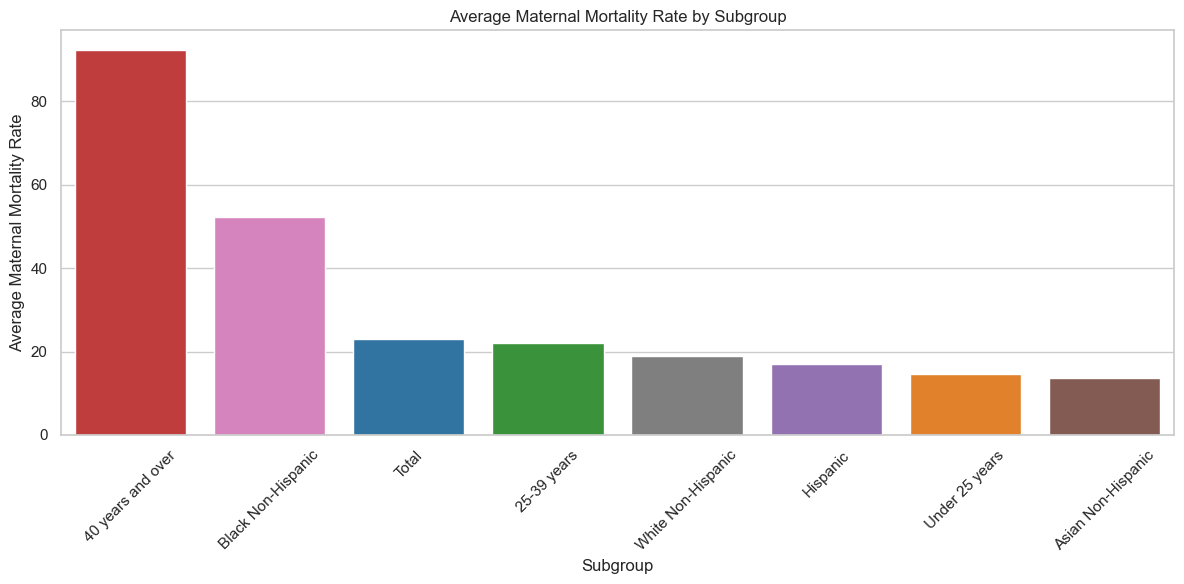

In [151]:
# Calculate average MMR for each subgroup and sort in descending order, excluding specified groups
mmr_by_subgroup = maternal.groupby('Subgroup')['Maternal Mortality Rate'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_mmr = mmr_by_subgroup[~mmr_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Maternal Mortality Rate by Subgroup:")
print("-" * 50)
for subgroup, mmr in filtered_mmr.items():
    print(f"•{subgroup}: {mmr:.2f}")

# Create a dictionary mapping each subgroup to a specific color
subgroup_colors = {
    'Total': '#1f77b4',  # blue
    'Under 25 years': '#ff7f0e',  # orange
    '25-39 years': '#2ca02c',  # green
    '40 years and over': '#d62728',  # red
    'Hispanic': '#9467bd',  # purple
    'Asian Non-Hispanic': '#8c564b',  # brown
    'Black Non-Hispanic': '#e377c2',  # pink
    'White Non-Hispanic': '#7f7f7f'   # gray
}

# Create the MMR plot with consistent colors
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_mmr.index, y=filtered_mmr.values, 
           palette=[subgroup_colors[x] for x in filtered_mmr.index])
plt.title("Average Maternal Mortality Rate by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Maternal Mortality Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Live Births by Subgroup:
--------------------------------------------------
•Total: 3,669,128
•25-39 years: 2,716,036
•White Non-Hispanic: 1,863,051
•Hispanic: 903,570
•Under 25 years: 816,371
•Black Non-Hispanic: 521,907
•Asian Non-Hispanic: 222,966
•40 years and over: 136,721


/var/folders/yn/fg2995w94pg75m_lh38dgtg80000gn/T/ipykernel_15159/3373991190.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_births.index, y=filtered_births.values,


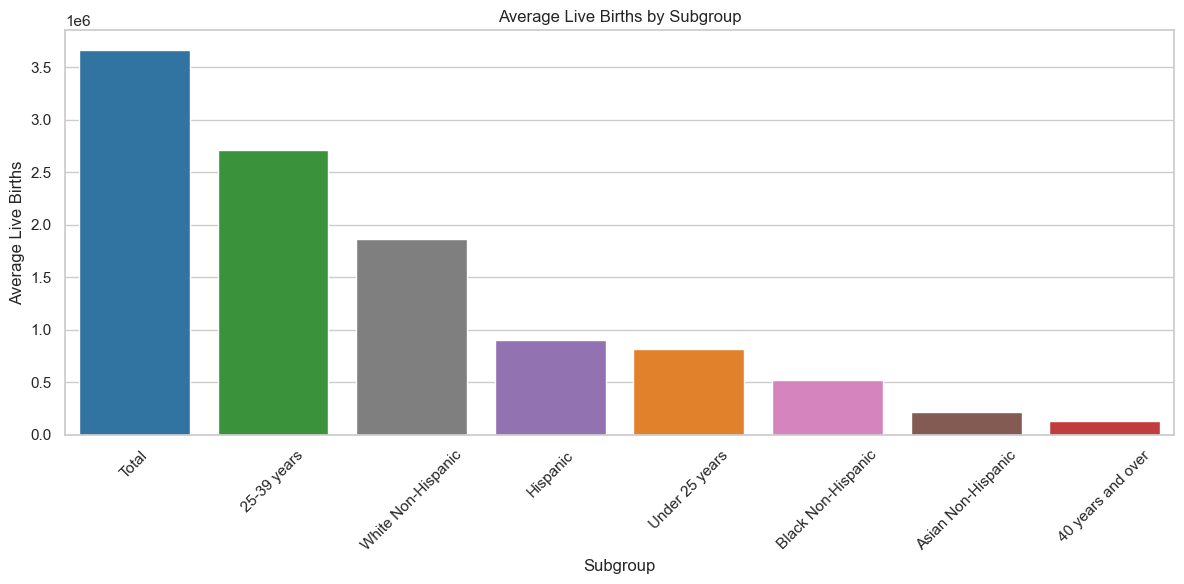

In [152]:
# Calculate average live births for each subgroup and sort in descending order
births_by_subgroup = maternal.groupby('Subgroup')['Live Births'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_births = births_by_subgroup[~births_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Live Births by Subgroup:")
print("-" * 50)
for subgroup, births in filtered_births.items():
    print(f"•{subgroup}: {births:,.0f}")

# Create the Live Births plot with the same colors
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_births.index, y=filtered_births.values, 
           palette=[subgroup_colors[x] for x in filtered_births.index])
plt.title("Average Live Births by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Live Births")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Maternal Deaths by Subgroup:
--------------------------------------------------
•Total: 842
•25-39 years: 598
•White Non-Hispanic: 354
•Black Non-Hispanic: 273
•Hispanic: 153
•40 years and over: 126
•Under 25 years: 118
•Asian Non-Hispanic: 31


/var/folders/yn/fg2995w94pg75m_lh38dgtg80000gn/T/ipykernel_15159/2850897611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_deaths.index, y=filtered_deaths.values,


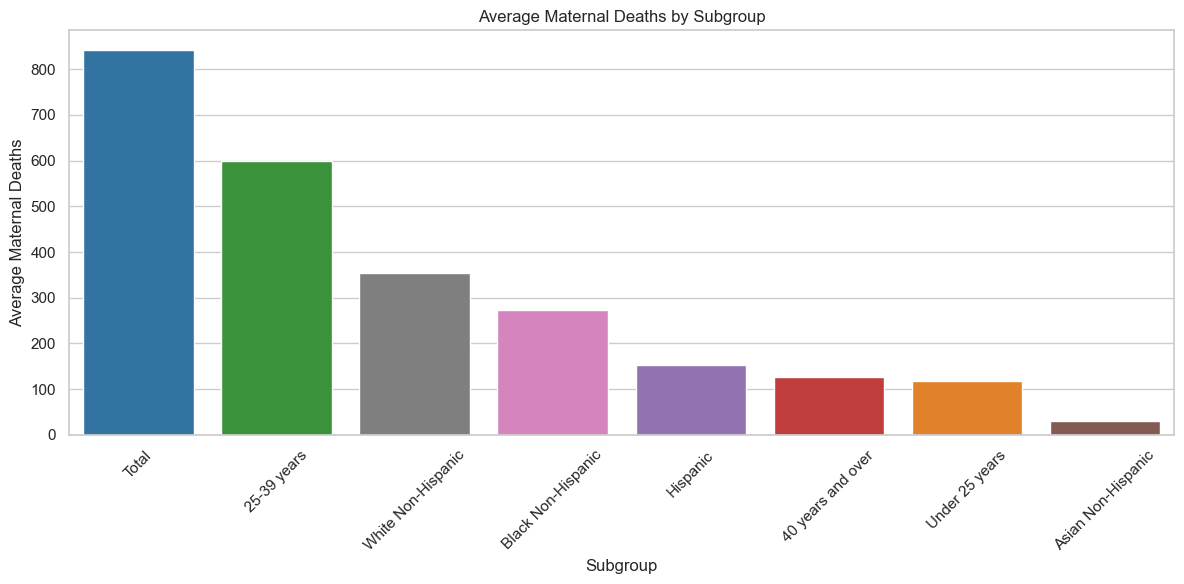

In [167]:
# Calculate average Maternal Deaths for each subgroup and sort in descending order
deaths_by_subgroup = maternal.groupby('Subgroup')['Maternal Deaths'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_deaths = deaths_by_subgroup[~births_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Maternal Deaths by Subgroup:")
print("-" * 50)
for subgroup, births in filtered_births.items():
    print(f"•{subgroup}: {births:,.0f}")

# Create the Maternal Deaths plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_deaths.index, y=filtered_deaths.values, 
           palette=[subgroup_colors[x] for x in filtered_deaths.index])
plt.title("Average Maternal Deaths by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Maternal Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

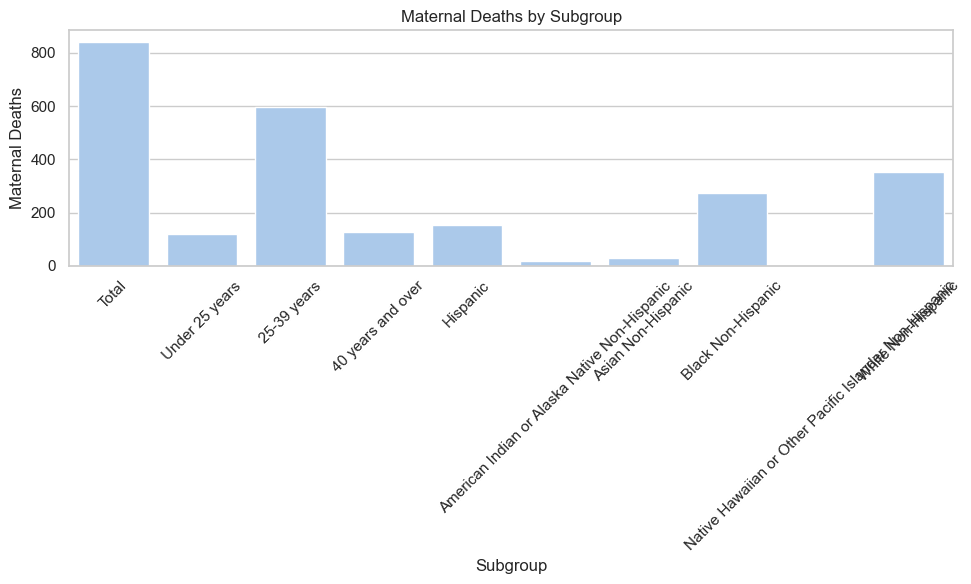

In [168]:
# Import csv file
maternal = pd.read_csv('maternal data #1.csv')

# Make a bar chart of the number of maternal deaths for each subgroup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(10, 6))
# Set the color palette
sns.set_palette("pastel")
# Create a bar plot
sns.barplot(x='Subgroup', y='Maternal Deaths', data=maternal, errorbar=None)
# Set the title and labels
plt.title('Maternal Deaths by Subgroup')
plt.xlabel('Subgroup')
plt.ylabel('Maternal Deaths')
# Rotate the x-axis labels
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()





In [169]:
# Show me the averages for each subgroup of maternal deaths
import pandas as pd
import numpy as np
# Import the data
maternal = pd.read_csv('maternal data #1.csv')
# Group the data by subgroup and calculate the mean of maternal deaths
averages = maternal.groupby('Subgroup')['Maternal Deaths'].mean().reset_index()
# Sort the averages in descending order
averages = averages.sort_values(by='Maternal Deaths', ascending=False)
# Print the averages
print(averages)

                                            Subgroup  Maternal Deaths
7                                              Total       842.287879
0                                        25-39 years       597.984848
9                                 White Non-Hispanic       353.893939
4                                 Black Non-Hispanic       272.651515
5                                           Hispanic       153.212121
1                                  40 years and over       125.712121
8                                     Under 25 years       118.409091
3                                 Asian Non-Hispanic        30.590909
2      American Indian or Alaska Native Non-Hispanic        16.305085
6  Native Hawaiian or Other Pacific Islander Non-...         0.000000


## Categorical Data

In [170]:
# Show the first 10 rows of the "Group" column
df['Group'].head(10)

NameError: name 'df' is not defined

In [ ]:
# Calculate the distinct values of the "Group" column
df['Group'].unique()

array(['Total', 'Age', 'Race and Hispanic origin'], dtype=object)

In [ ]:
# Calculate the frequency of each category in the "Group" column
df['Group'].value_counts()

Group
Race and Hispanic origin    396
Age                         198
Total                        66
Name: count, dtype: int64

In [ ]:
# Calcualate the proportions of each category in the "Group" column
df['Group'].value_counts(normalize=True)

Group
Race and Hispanic origin    0.6
Age                         0.3
Total                       0.1
Name: proportion, dtype: float64

In [ ]:
# Calcualte the frequency of each category in the "Subgroup" column
df.Subgroup.value_counts()

Subgroup
Total                                                      66
Under 25 years                                             66
25-39 years                                                66
40 years and over                                          66
Hispanic                                                   66
American Indian or Alaska Native, Non-Hispanic             66
Asian, Non-Hispanic                                        66
Black, Non-Hispanic                                        66
Native Hawaiian or Other Pacific Islander, Non-Hispanic    66
White, Non-Hispanic                                        66
Name: count, dtype: int64

In [ ]:
# Calculate the pecentage of each category in the "Subgroup" column
df.Subgroup.value_counts(normalize=True) * 100

Subgroup
Total                                                      10.0
Under 25 years                                             10.0
25-39 years                                                10.0
40 years and over                                          10.0
Hispanic                                                   10.0
American Indian or Alaska Native, Non-Hispanic             10.0
Asian, Non-Hispanic                                        10.0
Black, Non-Hispanic                                        10.0
Native Hawaiian or Other Pacific Islander, Non-Hispanic    10.0
White, Non-Hispanic                                        10.0
Name: proportion, dtype: float64

In [ ]:
# Create a cross-tabulation of the "Group" and "Subgroup" columns
pd.crosstab(df.Group, df.Subgroup)

Subgroup,25-39 years,40 years and over,"American Indian or Alaska Native, Non-Hispanic","Asian, Non-Hispanic","Black, Non-Hispanic",Hispanic,"Native Hawaiian or Other Pacific Islander, Non-Hispanic",Total,Under 25 years,"White, Non-Hispanic"
Group,,,,,,,,,,
Age,66,66,0,0,0,0,0,0,66,0
Race and Hispanic origin,0,0,66,66,66,66,66,0,0,66
Total,0,0,0,0,0,0,0,66,0,0


## Comparative numerical analysis

In [ ]:
# Calculate the mean of the "Maternal Mortality Rate" column for each of the "Subgroup" categories
df.groupby('Subgroup')['Maternal Mortality Rate'].mean()

Subgroup
25-39 years                                                22.015152
40 years and over                                          92.350000
American Indian or Alaska Native, Non-Hispanic             95.728571
Asian, Non-Hispanic                                        13.721212
Black, Non-Hispanic                                        52.360606
Hispanic                                                   17.003030
Native Hawaiian or Other Pacific Islander, Non-Hispanic     0.000000
Total                                                      22.974242
Under 25 years                                             14.563636
White, Non-Hispanic                                        18.974242
Name: Maternal Mortality Rate, dtype: float64

## Numerical Data Analysis

In [ ]:
# Calculate the mean of the "Maternal Mortality Rate" column
df['Maternal Mortality Rate'].mean()

np.float64(33.27518382352941)

In [ ]:
# Calculate the sample standard deviation of the "Maternal Mortality Rate" column
df['Maternal Mortality Rate'].std()

np.float64(29.2671776694006)

In [ ]:
# Describe the summary statistics of the "Maternal Mortality Rate" column
df['Maternal Mortality Rate'].describe()

count    544.000000
mean      33.275184
std       29.267178
min        0.000000
25%       14.900000
50%       19.800000
75%       42.675000
max      141.900000
Name: Maternal Mortality Rate, dtype: float64

In [ ]:
# Describe the summary statistics of the "Maternal Mortality Rate" column for each category in the "Subgroup" categories
df.groupby('Subgroup')['Maternal Mortality Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
25-39 years,66.0,22.015152,4.555512,16.4,18.700,20.20,23.925,32.2
40 years and over,66.0,92.350000,26.388816,56.3,72.500,79.35,119.525,141.9
"American Indian or Alaska Native, Non-Hispanic",14.0,95.728571,10.758212,77.6,92.025,94.30,100.000,118.7
"Asian, Non-Hispanic",66.0,13.721212,2.659469,9.1,11.925,13.35,15.100,19.8
"Black, Non-Hispanic",66.0,52.360606,9.240594,38.3,47.325,50.25,57.500,72.7
Hispanic,66.0,17.003030,5.489962,10.1,13.125,14.95,20.900,28.5
"Native Hawaiian or Other Pacific Islander, Non-Hispanic",2.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.0
Total,66.0,22.974242,4.906646,17.3,19.225,20.80,25.200,33.8
Under 25 years,66.0,14.563636,2.906896,10.8,12.600,13.25,16.225,21.4


In [ ]:
# Calculate the correlation between the "Maternal Mortality Rate" and "Supgroup" columns of rows 68-133
df.loc[68:133, ['Maternal Mortality Rate', 'Subgroup']].corr()

ValueError: could not convert string to float: 'Under 25 years'

<h2 style="color: #800080;">DATA VISUALIZATION</h2>

## Package Import

In [ ]:
import pandas
import seaborn
from matplotlib import pyplot

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
seaborn.set_style('whitegrid')

## Data Import

In [ ]:
df = pandas.read_csv('maternal data #1.csv')

NameError: name 'pandas' is not defined

In [ ]:
# Show the size of 'df'
df.shape

(660, 12)

In [ ]:
# Show the first 5 rows of 'df'
df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,10/6/24,United States,Total,Total,2019,1,12 month-ending,1/31/19,660,"3,787,776",17.4,NaN
1,10/6/24,United States,Total,Total,2019,2,12 month-ending,2/28/19,653,"3,783,489",17.3,NaN
2,10/6/24,United States,Total,Total,2019,3,12 month-ending,3/31/19,657,"3,771,682",17.4,NaN
3,10/6/24,United States,Total,Total,2019,4,12 month-ending,4/30/19,668,"3,772,235",17.7,NaN
4,10/6/24,United States,Total,Total,2019,5,12 month-ending,5/31/19,706,"3,767,999",18.7,NaN


## Summary Statistics

In [ ]:
df.columns

Index(['Data As Of', 'Jurisdiction', 'Group', 'Subgroup', 'Year of Death',
       'Month of Death', 'Time Period', 'Month Ending Date', 'Maternal Deaths',
       'Live Births', 'Maternal Mortality Rate', 'Footnote'],
      dtype='object')

In [ ]:
# Summary statistics for maternal mortality rate column
df['Maternal Mortality Rate'].describe()

count    544.000000
mean      33.275184
std       29.267178
min        0.000000
25%       14.900000
50%       19.800000
75%       42.675000
max      141.900000
Name: Maternal Mortality Rate, dtype: float64

In [ ]:
# Summary statistics of the 'Maternal Mortality Rate' column for each category of the 'Live Births' column
df.groupby('Maternal Mortality Rate')['Live Births'].describe()

,count,unique,top,freq
Maternal Mortality Rate,,,,
0.0,2,2,"10,150",1
9.1,1,1,"218,594",1
9.7,1,1,"217,336",1
10.0,1,1,"218,984",1
10.1,3,3,"883,687",1
...,...,...,...,...
137.8,1,1,"139,291",1
138.4,1,1,"137,995",1
138.5,1,1,"135,735",1


In [ ]:
# Show a frequency table of 'maternal deaths' versus 'Live Births'
df.groupby('Maternal Mortality Rate')['Live Births'].value_counts()

Maternal Mortality Rate  Live Births
0.0                      10,150         1
                         10,189         1
9.1                      218,594        1
9.7                      217,336        1
10.0                     218,984        1
                                       ..
137.8                    139,291        1
138.4                    137,995        1
138.5                    135,735        1
138.9                    140,394        1
141.9                    131,774        1
Name: count, Length: 544, dtype: int64

## Data visualization

<Axes: xlabel='Live Births', ylabel='Maternal Deaths'>

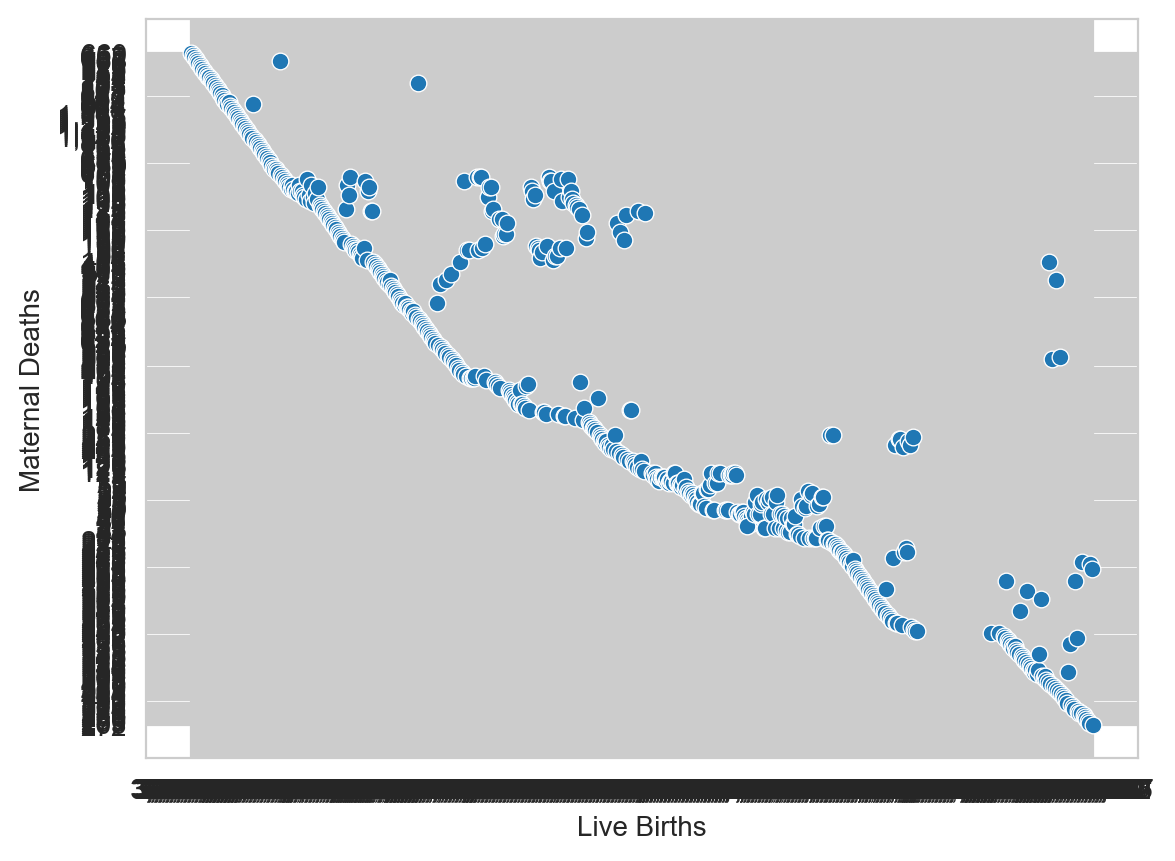

In [ ]:
# Use seaborn to create a scatter plot of 'Maternal Mortality Rate' versus 'Live Births'
seaborn.scatterplot(x='Live Births', y='Maternal Deaths', data=df)


<Axes: xlabel='Live Births', ylabel='Maternal Deaths'>

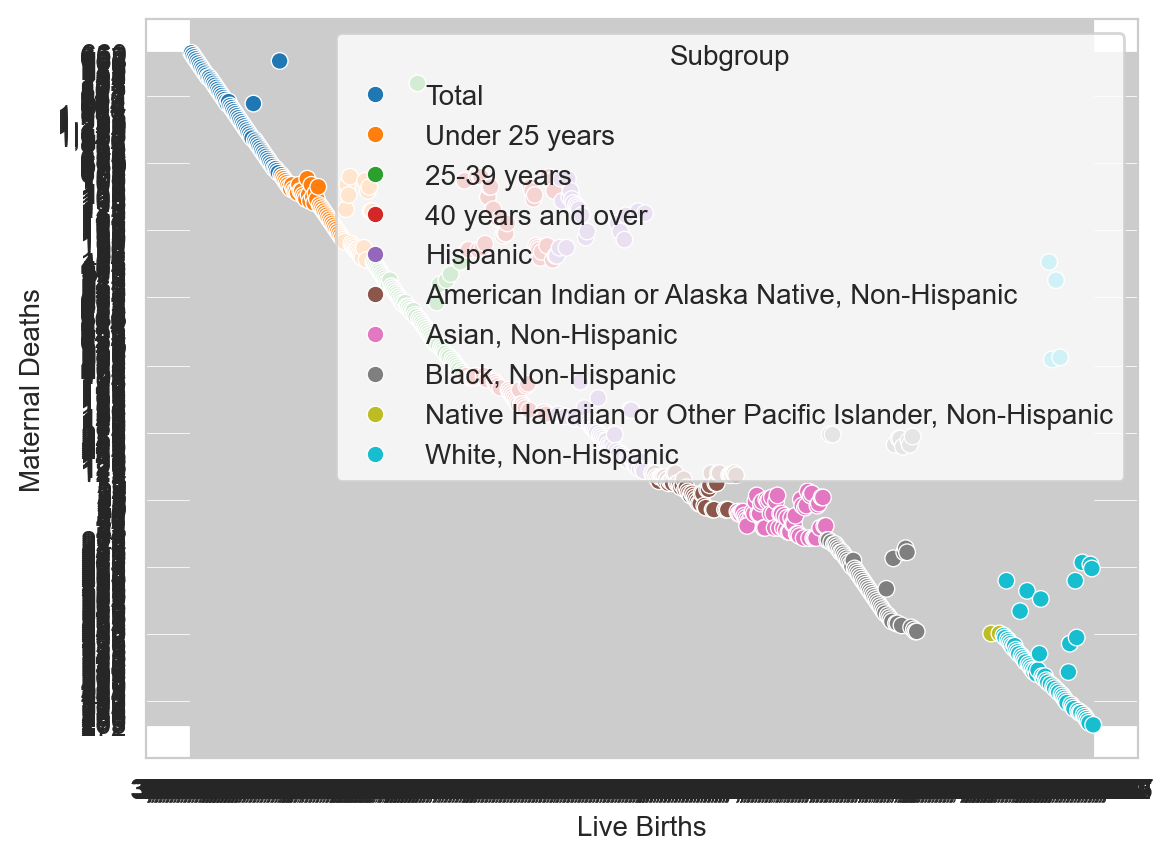

In [ ]:
# Recreate the plot and distinguish between the 'subgroup' categories 
# using the different colors and the 'maternal deaths'
seaborn.scatterplot(x='Live Births', y='Maternal Deaths', hue='Subgroup', data=df)

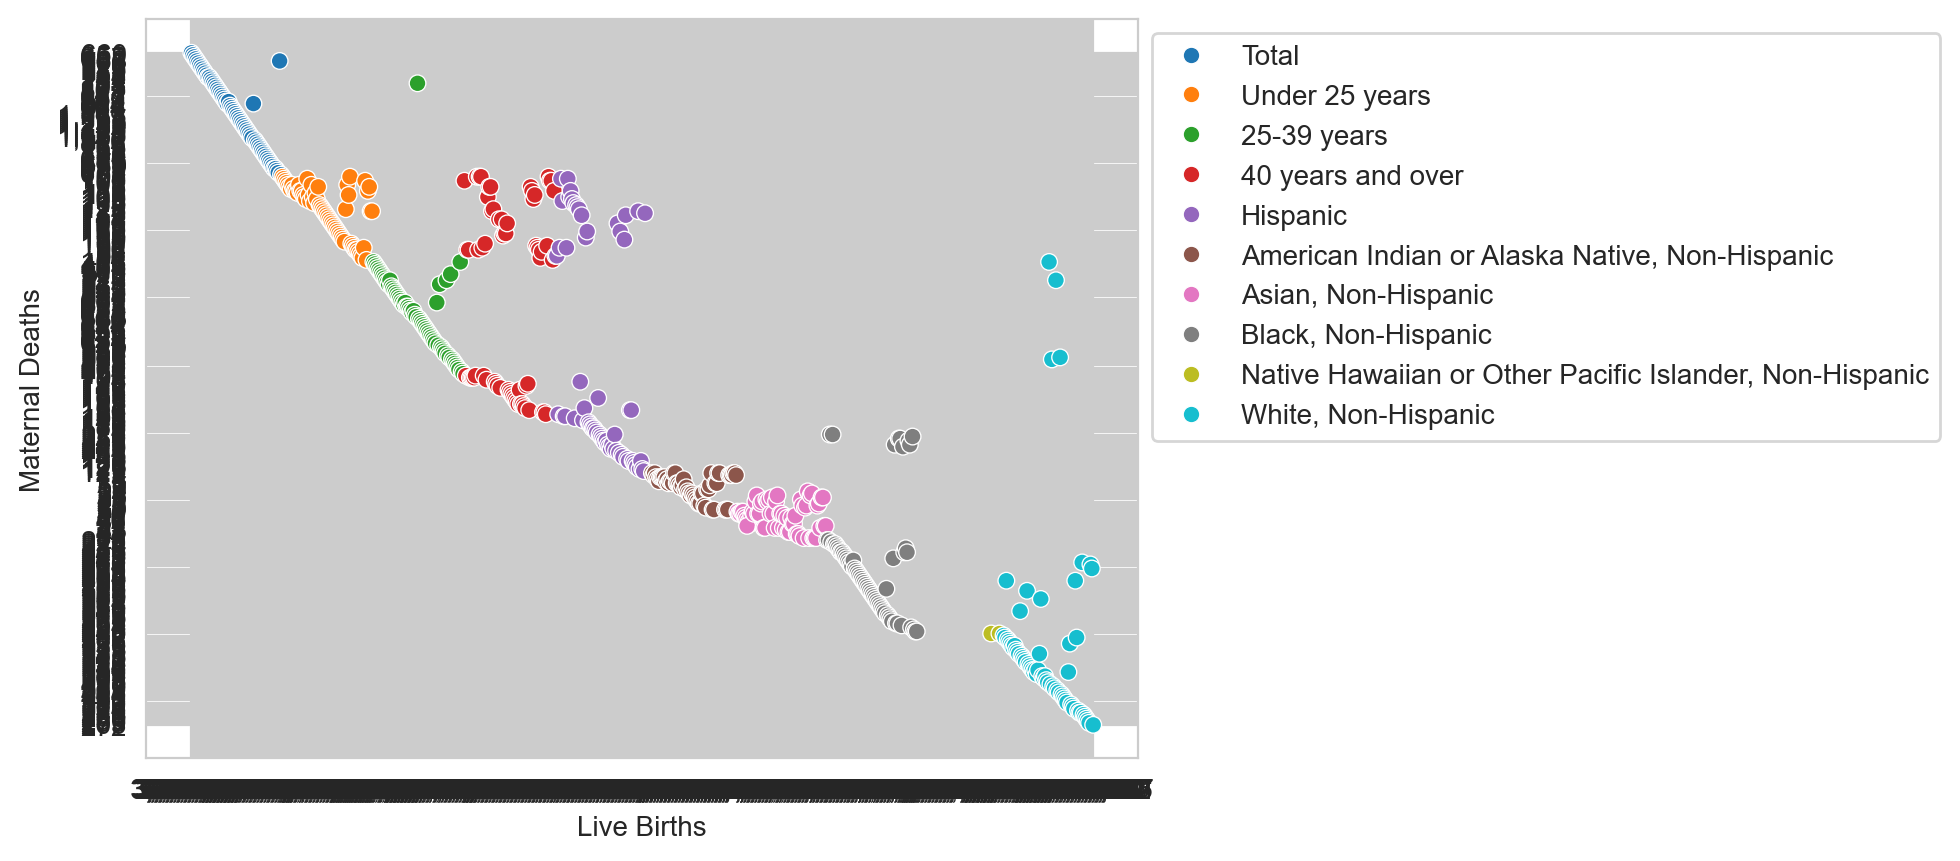

In [ ]:
# make the same graph as above but make it with the key on a different slide so I can see the graph
seaborn.scatterplot(x='Live Births', y='Maternal Deaths', hue='Subgroup', data=df)
pyplot.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [ ]:
# Recreate the plot and distinguish between the 'death' categories using the different styles and different colors as above
seaborn.scatterplot(data=df, x='age', y='platelets', hue='death', style='death');


ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

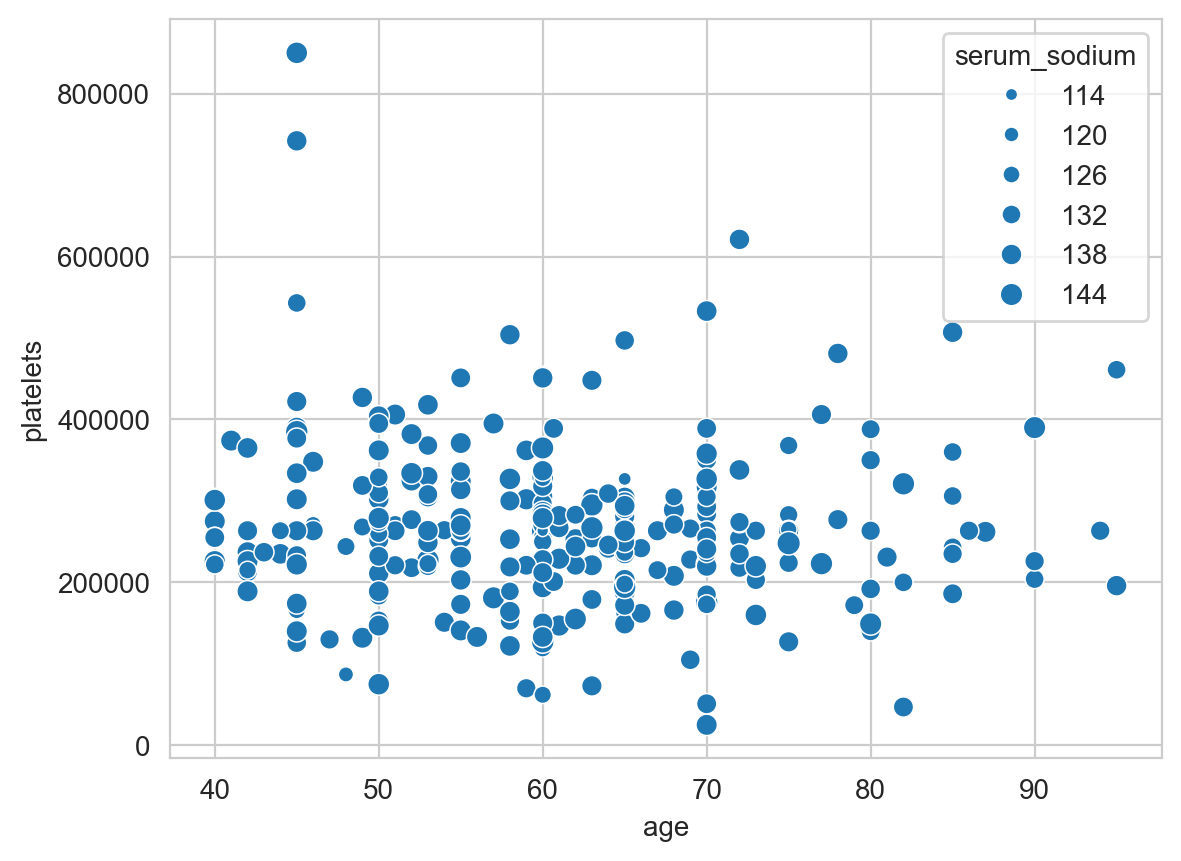

In [ ]:
# Create a scatter plot of 'age' versus 'platelets' and add 'serum_sodium' as the size of the points
seaborn.scatterplot(data=df, x='age', y='platelets', size='serum_sodium');

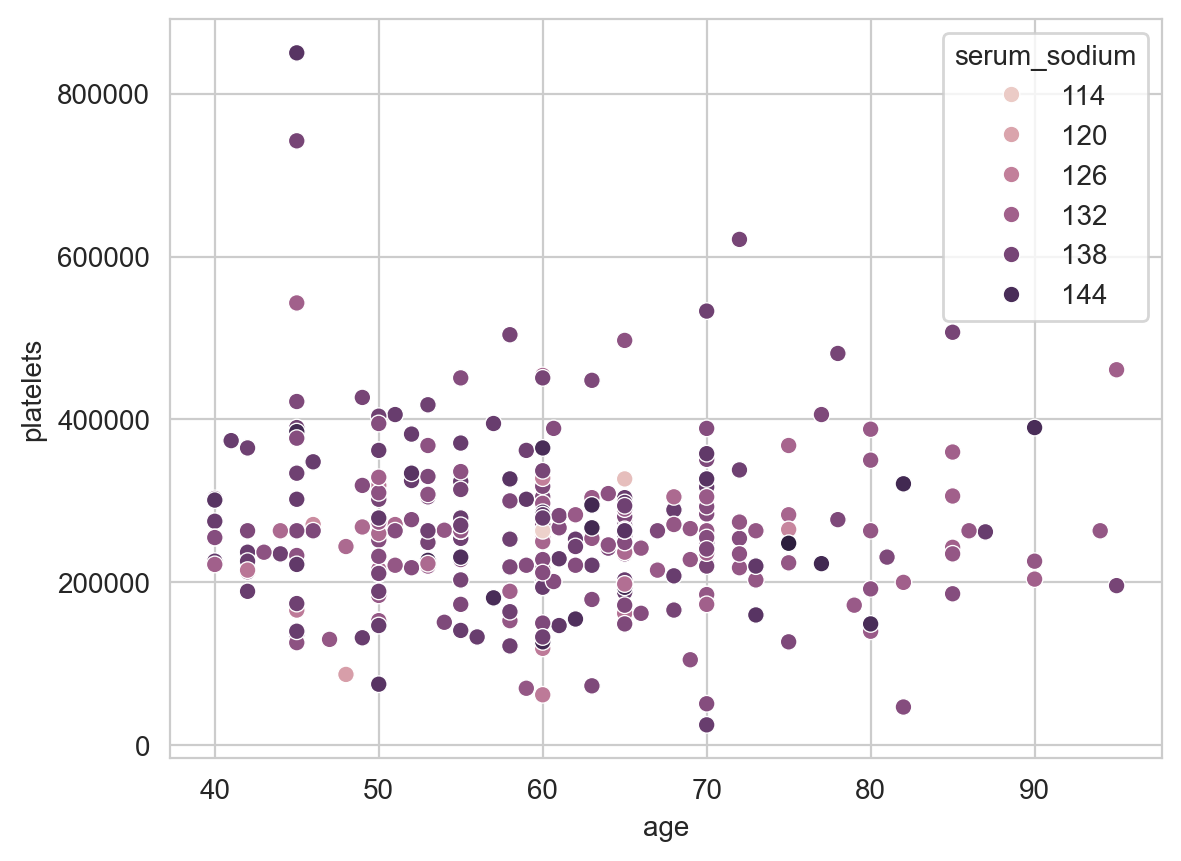

In [ ]:
# Create a scatter plot of 'age' versus 'platelets' and add 'serum_sodium' as different colors
seaborn.scatterplot(data=df, x='age', y='platelets', hue='serum_sodium');

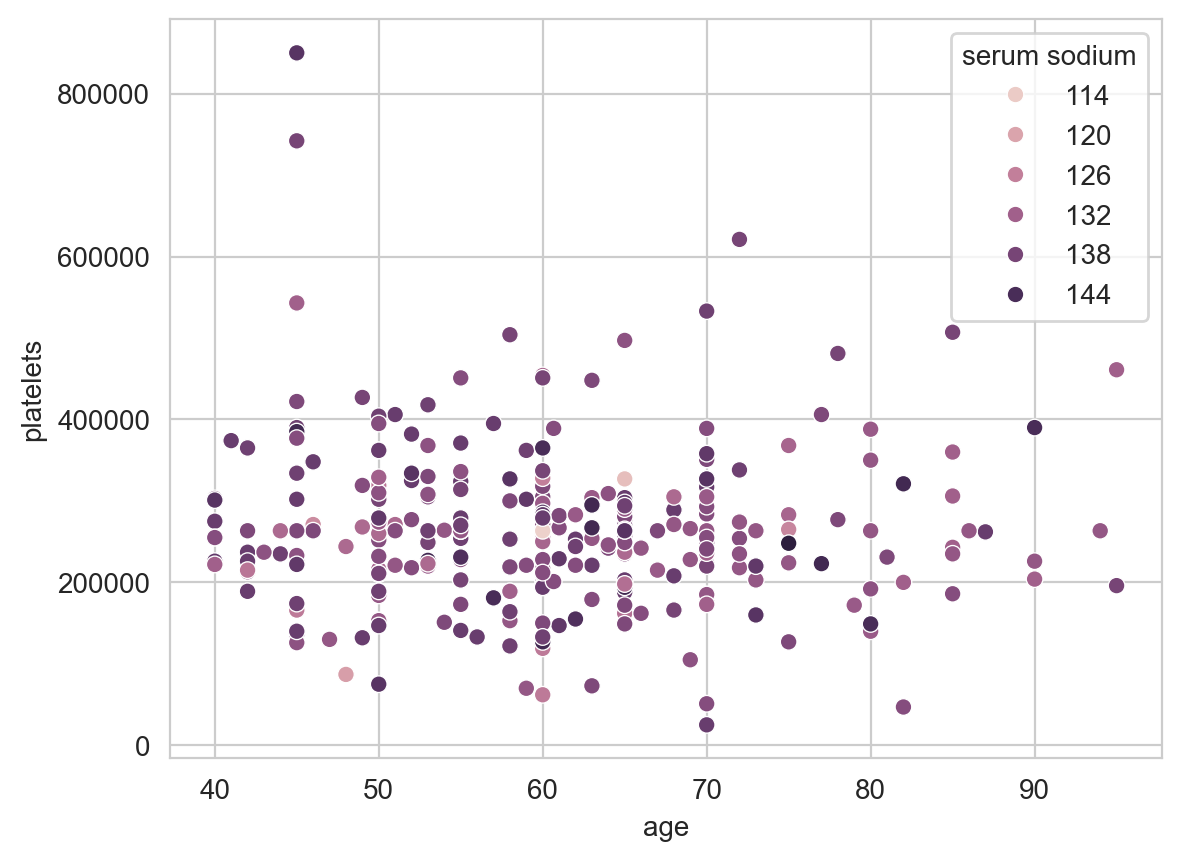

In [ ]:
# Recreate the plot above but change the legend title to "serum sodium"
seaborn.scatterplot(data=df, x='age', y='platelets', hue='serum_sodium').legend(title='serum sodium');

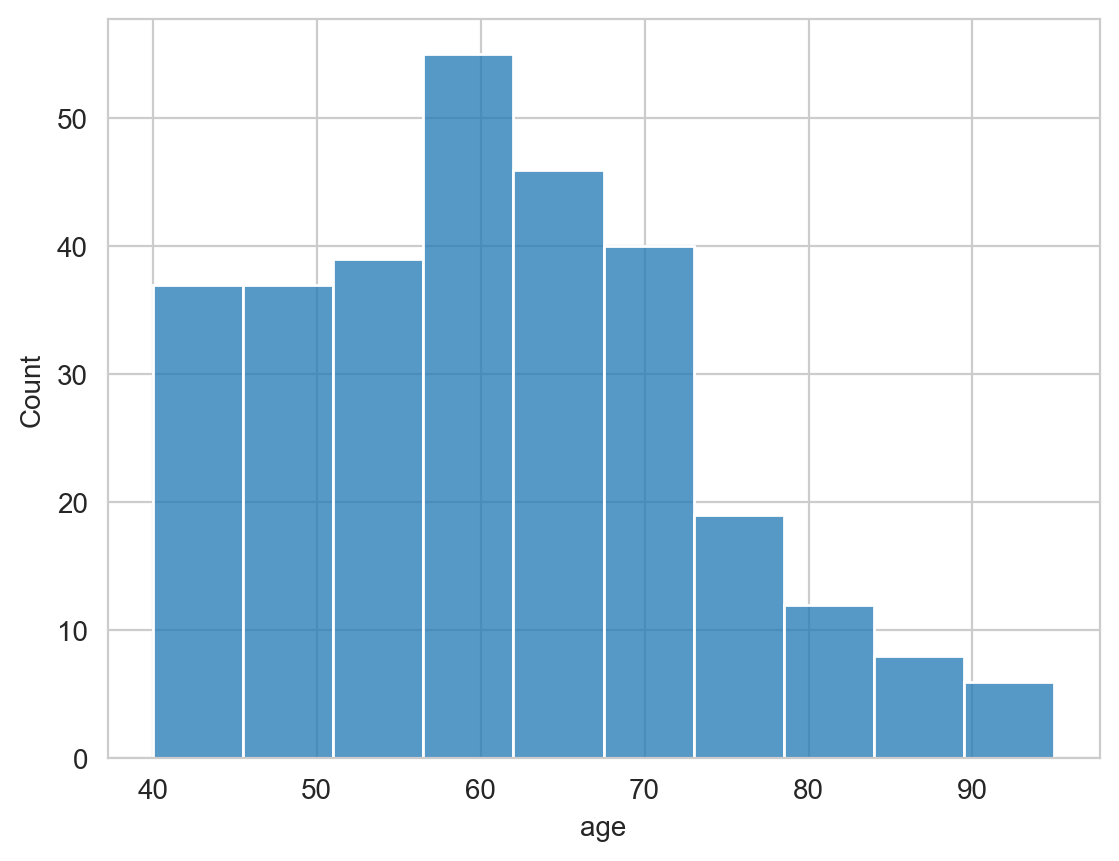

In [ ]:
# Use seaborn to create a scatter plot of the 'age' column
seaborn.histplot(data=df, x='age');

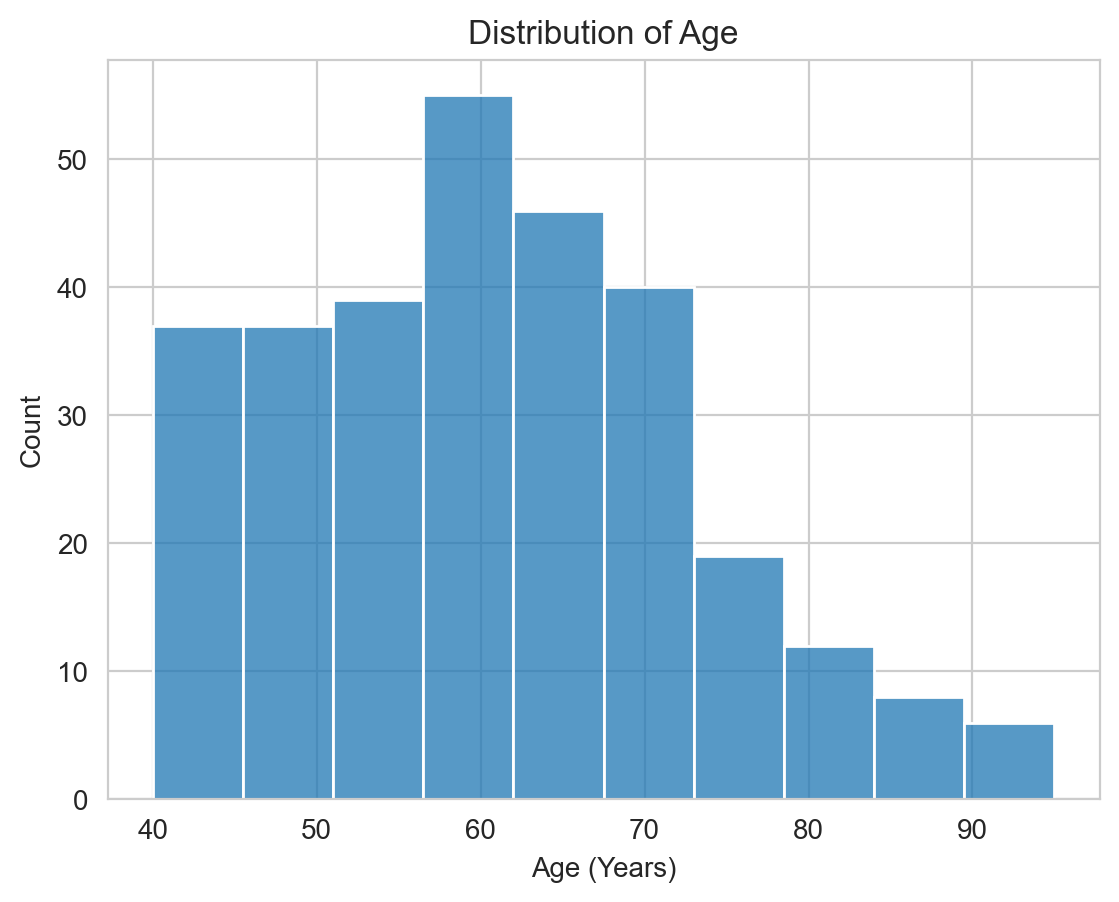

In [ ]:
# Recreate the plot above and add the title "Distribution of Age" and the x-axis label "Age (Years)"
seaborn.histplot(data=df, x='age')
pyplot.title('Distribution of Age')
pyplot.xlabel('Age (Years)');


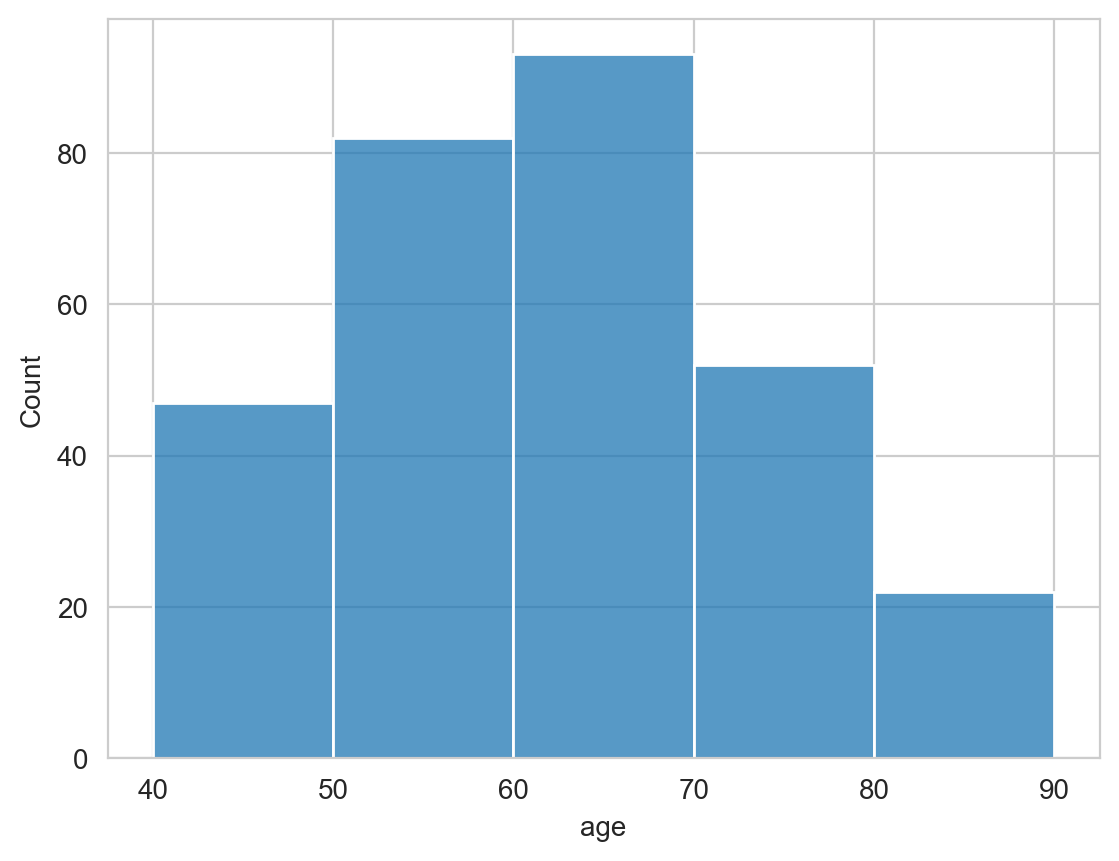

In [ ]:
# Recreate the histogram above but set the bin size to 10 starting at 40 and incrementing in steps of 10
seaborn.histplot(data=df, x='age', bins=range(40, 100, 10));


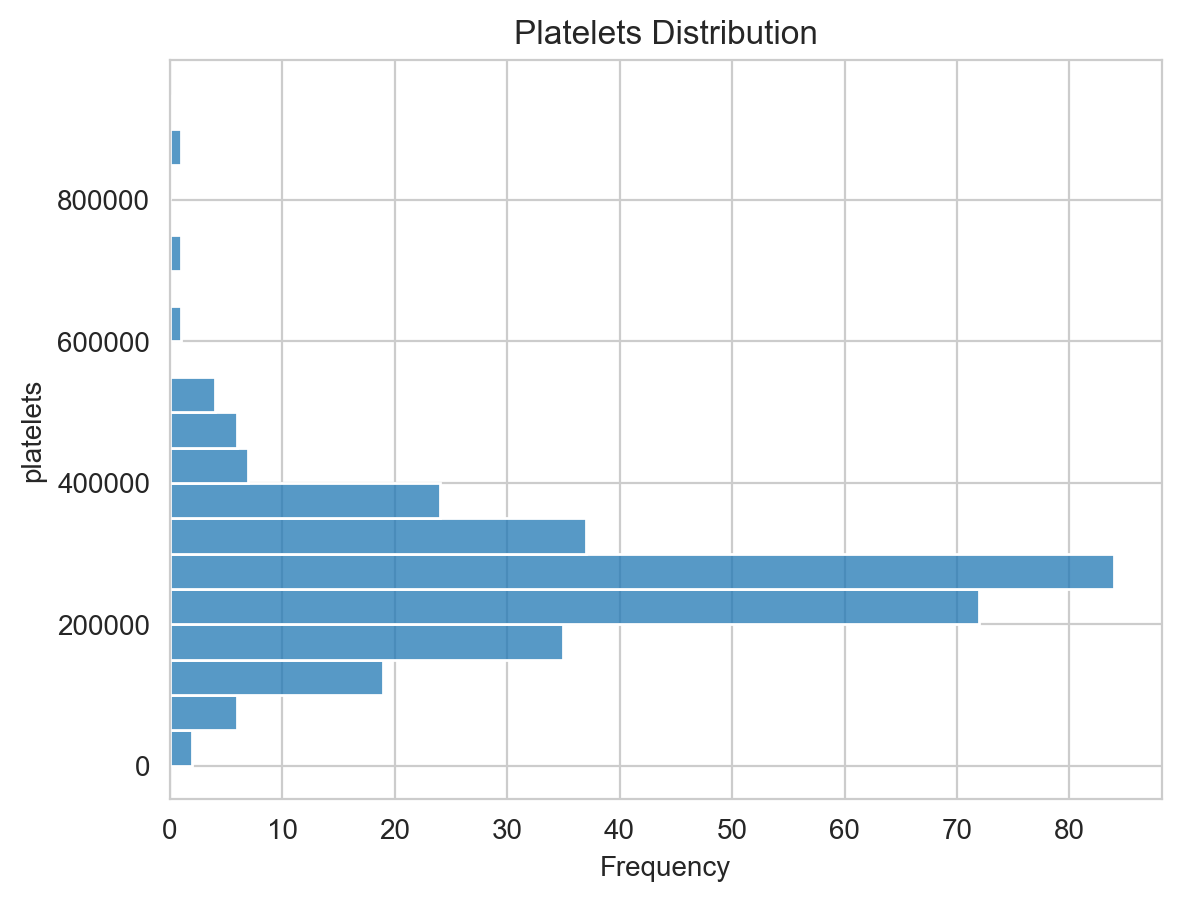

In [ ]:
# Create a horizontal histogram of the 'platelets' column
# For the bins, start at 0 and increment in steps of 50,000
# Add the title "Platelets Distribution" and the x-axis label "Frequency"
seaborn.histplot(data=df, y='platelets', bins=range(0, 1000000, 50000))
pyplot.title('Platelets Distribution')
pyplot.xlabel('Frequency');

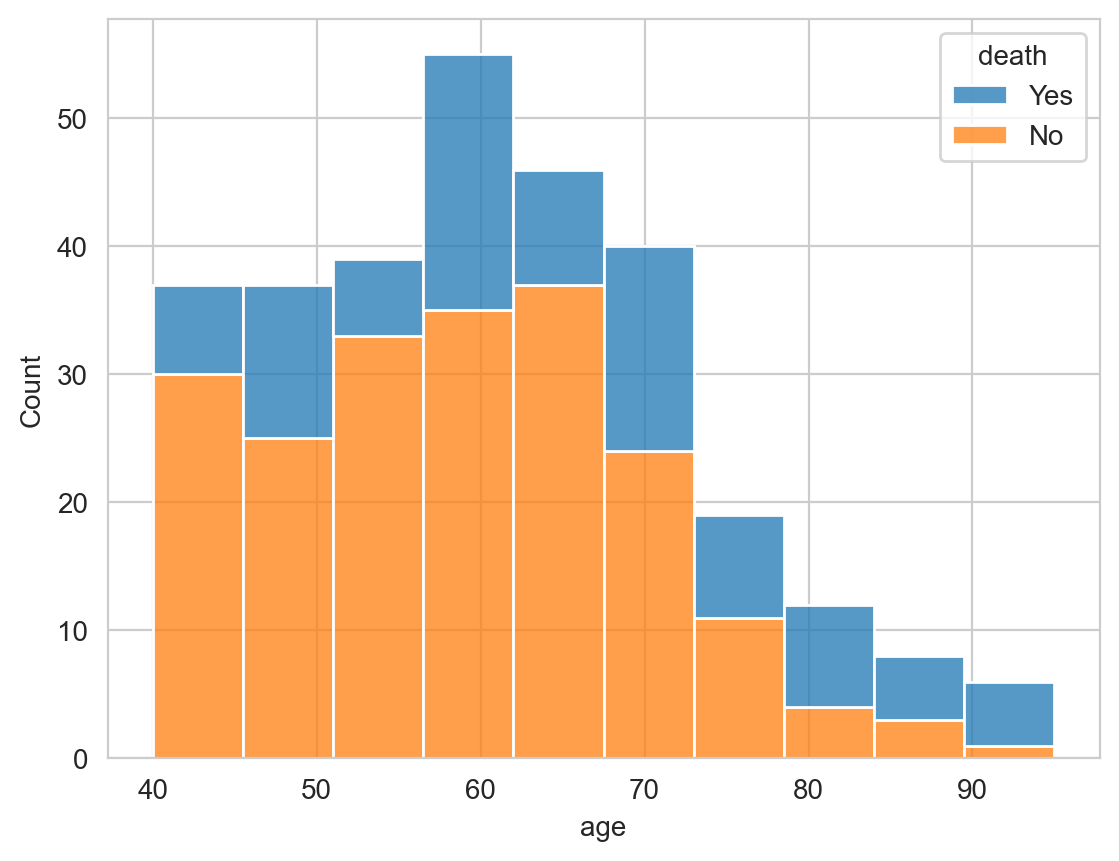

In [ ]:
# Create a vertical histogram of the 'age' column for each category of the 'death' column
seaborn.histplot(data=df, x='age', hue='death', multiple='stack');

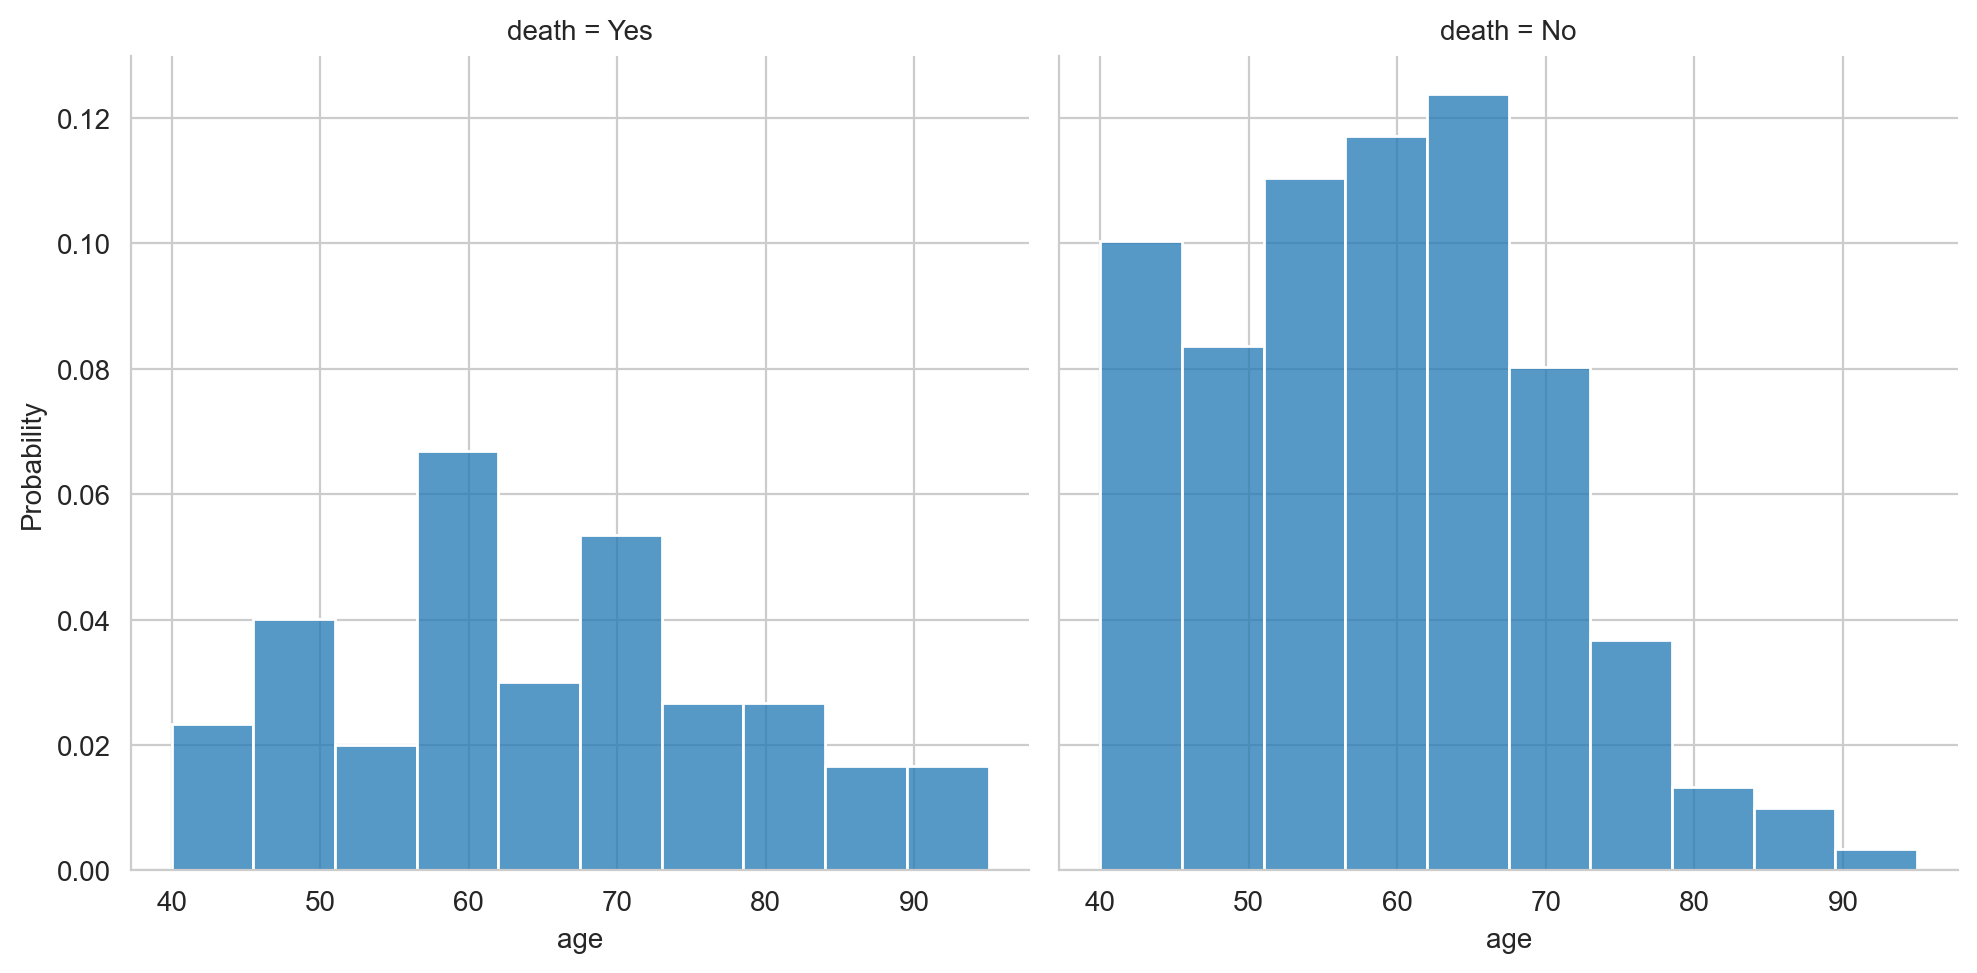

In [ ]:
# Create two histograms that are next to eachother, one showing the survivors and the other showing the non-survivors
seaborn.displot(data=df, x='age', col='death', stat= 'probability');



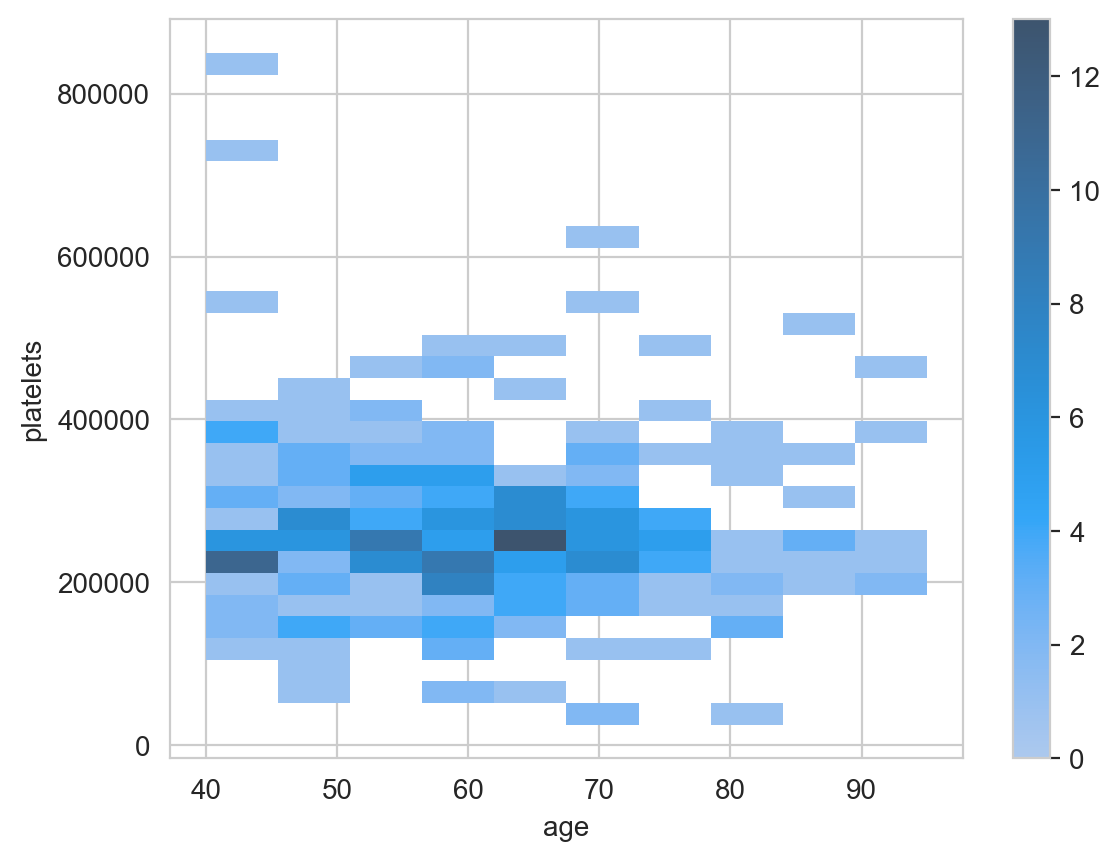

In [ ]:
# Create a heat map of age versus platelets
# Add a color bar to the heat map
seaborn.histplot(data=df, x='age', y='platelets', cbar=True);

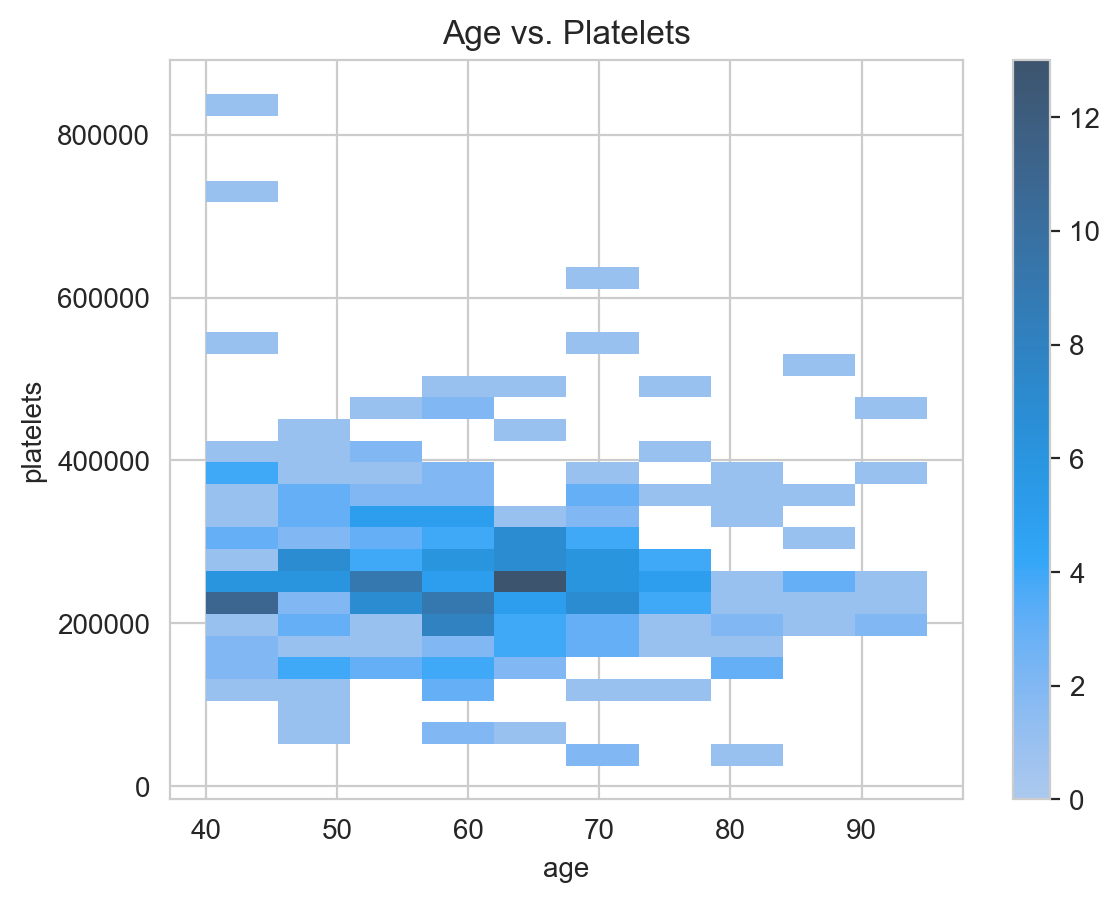

In [ ]:
g = seaborn.histplot(data=df, x='age', y='platelets', cbar=True)
g.set_title('Age vs. Platelets');


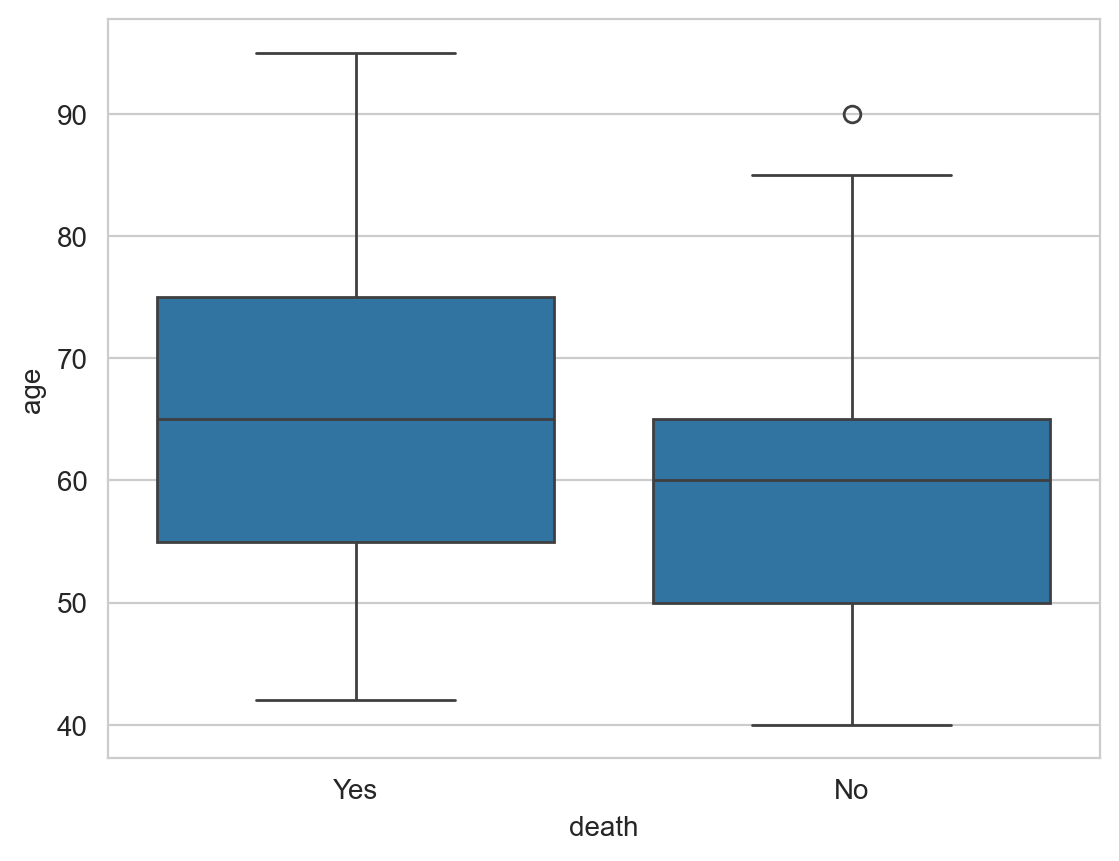

In [ ]:
# Create a box and whisker plot of the 'age' column for each category in the 'death' column
seaborn.boxplot(data=df, x='death', y='age');

In [ ]:
### Importing Packages
import pandas as pd
from scipy import stats
# Import csv file into a pandas dataframe
df = pd.read_csv('maternal data #1.csv')
# Verify the size of df
print(df.shape)
# Show the column headers
print(df.columns)
# Show the first 5 rows of the dataframe
df.head()
# Show info about df
df.info()

(660, 12)
Index(['Data As Of', 'Jurisdiction', 'Group', 'Subgroup', 'Year of Death',
       'Month of Death', 'Time Period', 'Month Ending Date', 'Maternal Deaths',
       'Live Births', 'Maternal Mortality Rate', 'Footnote'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data As Of               660 non-null    object 
 1   Jurisdiction             660 non-null    object 
 2   Group                    660 non-null    object 
 3   Subgroup                 660 non-null    object 
 4   Year of Death            660 non-null    int64  
 5   Month of Death           660 non-null    int64  
 6   Time Period              660 non-null    object 
 7   Month Ending Date        660 non-null    object 
 8   Maternal Deaths          589 non-null    object 
 9   Live Births              660 non-null    object